In [1]:
# Imports
import os
import tensorflow as tf
import math
import matplotlib.pyplot as plt



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

***

# CSVLogger

As the name suggests, this callback logs the training details in a CSV file. The logged parameters are `epoch`, `accuracy`, `loss`, `val_accuracy`, and `val_loss`. One thing to keep in mind is that you need to pass accuracy as a metric while compiling the model, otherwise you will get an execution error.

```
tf.keras.callbacks.CSVLogger(filename, 
                             separator=',', 
                             append=False)
```

The logger accepts the filename, separator, and append as parameters. append defines whether or not to append to an existing file, or write in a new file instead.

The CSVLogger callback is executed via the `on_epoch_end` trigger of training. So when an epoch ends, the logs are put into a file.



***


## Preparing Dataset 

***

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

11493376/11490434 [==============================] - 0s 0us/step


## Define the Model

In [3]:
# Define a simple sequential model
def create_model():
  model = Sequential([
    Dense(512, activation='relu', input_shape=(784,), name = 'Layer-1'),
    Dropout(0.2),
    Dense(10, name = "Layer-2")
  ])

  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer-1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
Layer-2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## CSVLogger

First, let’s import it and create a CSVLogger object

In [7]:
from tensorflow.keras.callbacks import CSVLogger
result_path = '/content/result.csv'
csv_log = CSVLogger(result_path)

Next, we just need to pass the **csv_log** object to `model.fit()` method.

In [8]:
# Train the model with the new callback
history = model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks = [csv_log])  # Pass callback to training

Epoch 1/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0303 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.4010 - val_sparse_categorical_accuracy: 0.8700
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 0.0232 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.4084 - val_sparse_categorical_accuracy: 0.8730
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 0.0216 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.4096 - val_sparse_categorical_accuracy: 0.8720
Epoch 4/10
32/32 [==============================] - 0s 10ms/step - loss: 0.0170 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.4144 - val_sparse_categorical_accuracy: 0.8750
Epoch 5/10
32/32 [==============================] - 0s 7ms/step - loss: 0.0146 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.4065 - val_sparse_categorical_accuracy: 0.8760
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: 0.0123 - sparse_categorical_accuracy:

Once the training is completed, we can view the information in the CSV file


In [11]:
import pandas as pd
history = pd.read_csv(result_path, index_col='epoch')
history.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
epoch,,,,
0,0.030295,1.0,0.401027,0.870
1,0.023223,1.0,0.408369,0.873
2,0.021601,1.0,0.409642,0.872
3,0.016996,1.0,0.414416,0.875
4,0.014637,1.0,0.406487,0.876


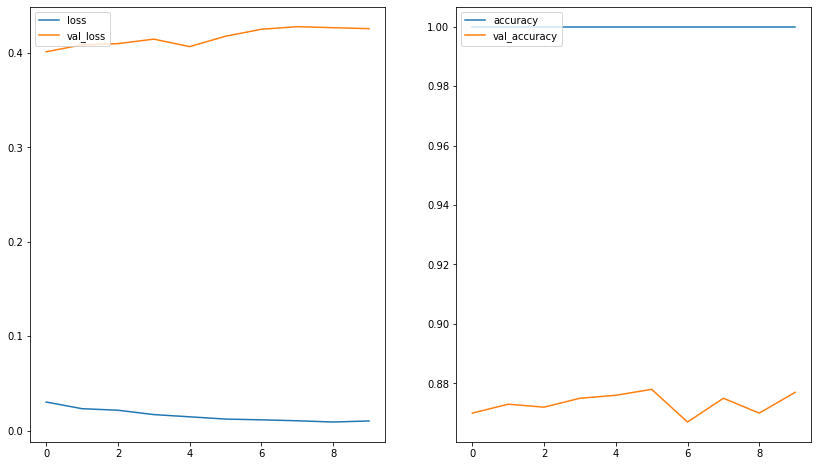

In [15]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history['sparse_categorical_accuracy'],label='accuracy')
plt.plot(history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

***
### CSVLogger with Arguments

Apart from the compulsory argument `filename`, the other 2 options: `separator` and `append` are likely to be used quite often.
```
CSVLogger(filename, separator=',', append=False)
```

- **filename:** is the filename of the CSV file.
- **separator:** string used to separate elements in the CSV file.
- **append:** is boolean and default to False, True append if file exists (useful for continuing training). False: overwrite existing file.

# References

1. [A Guide to TensorFlow Callbacks](https://blog.paperspace.com/tensorflow-callbacks/)
2. [Writing your own callbacks](https://www.tensorflow.org/guide/keras/custom_callback)
3. [tf.keras.callbacks.Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback)
4. [A Practical Introduction to Keras Callbacks in TensorFlow 2](https://towardsdatascience.com/a-practical-introduction-to-keras-callbacks-in-tensorflow-2-705d0c584966)
5. [How to use TensorFlow callbacks?](https://medium.com/ydata-ai/how-to-use-tensorflow-callbacks-f54f9bb6db25)
6. [Callbacks in Tensor Flow](https://sailajakarra.medium.com/callbacks-in-tensor-flow-f8e7f9996f5f)
7. [Keras Callbacks Explained In Three Minutes](https://www.kdnuggets.com/2019/08/keras-callbacks-explained-three-minutes.html)
8. [Learning Rate Schedule in Practice: an example with Keras and TensorFlow 2.0](https://towardsdatascience.com/learning-rate-schedule-in-practice-an-example-with-keras-and-tensorflow-2-0-2f48b2888a0c)
